In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import pandas as pd
from collections import defaultdict
import math
from sklearn.metrics import confusion_matrix


class CustomGaussianNB:
    def __init__(self):
        self.class_means = defaultdict(list)
        self.class_stdevs = defaultdict(list)
        self.class_priors = defaultdict(float)
        self.classes = None

    def separate_by_class(self, X, y):
        separated = defaultdict(list)
        for i in range(len(X)):
            separated[y[i]].append(X[i])
        return separated

    def calculate_mean(self, numbers):
        return sum(numbers) / float(len(numbers))

    def calculate_stdev(self, numbers):
        avg = self.calculate_mean(numbers)
        variance = sum([(x - avg) ** 2 for x in numbers]) / float(len(numbers) - 1)
        return math.sqrt(variance)

    def fit(self, X, y):
        self.classes = np.unique(y)
        separated = self.separate_by_class(X, y)
        for class_value, instances in separated.items():
            self.class_means[class_value] = [self.calculate_mean(attribute) for attribute in zip(*instances)]
            self.class_stdevs[class_value] = [self.calculate_stdev(attribute) for attribute in zip(*instances)]
            self.class_priors[class_value] = len(instances) / float(len(X))
        #print(self.class_means)

    def calculate_probability(self, x, mean, stdev):
        exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

    def calculate_class_probabilities(self, input_data):
        probabilities = {}
        for class_value in self.classes:
            probabilities[class_value] = self.class_priors[class_value]
            for i in range(len(self.class_means[class_value])):
                mean = self.class_means[class_value][i]
                stdev = self.class_stdevs[class_value][i]
                x = input_data[i]
                probabilities[class_value] *= self.calculate_probability(x, mean, stdev)
        return probabilities

    def predict(self, X):
        predictions = []
        for x in X:
            probabilities = self.calculate_class_probabilities(x)
            best_label, best_prob = None, -1
            for class_value, probability in probabilities.items():
                if best_label is None or probability > best_prob:
                    best_prob = probability
                    best_label = class_value
            predictions.append(best_label)
            #print(best_prob,best_label)
        return predictions


df = pd.read_csv('https://archive.ics.uci.edu/static/public/320/data.csv',sep=',')
#column_names_list = column_names.split(',')
grading_system = {(0,7):'Poor',(7,14):'Good',(14,20):'Excellent'}
def map_to_grade(value):
    for grade_range, grade in grading_system.items():
        if grade_range[0] <= value <= grade_range[1]:
            return grade

df['grade'] = df['G3'].apply(map_to_grade)

df = df[["G1","G2","grade","health","absences","studytime","famrel","freetime","traveltime"]]

X=np.array(df.drop(['grade'],axis=1))

y = np.array(df["grade"])


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize a custom Gaussian Naive Bayes classifier
custom_classifier = CustomGaussianNB()
# Train the classifier on the training data
custom_classifier.fit(X_train, y_train)

# Make predictions on the testing data
custom_y_pred = custom_classifier.predict(X_test)

# Print the predicted and actual values
print("Custom Predicted values:", custom_y_pred)
print("Actual values:", y_test)

# Calculate the accuracy of the custom classifier
custom_accuracy = accuracy_score(y_test, custom_y_pred)
print("Custom Accuracy:", custom_accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, custom_y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Custom Predicted values: ['Excellent', 'Good', 'Excellent', 'Good', 'Good', 'Excellent', 'Excellent', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Excellent', 'Good', 'Good', 'Poor', 'Excellent', 'Excellent', 'Excellent', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Excellent', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Excellent', 'Good', 'Good', 'Good', 'Good', 'Excellent', 'Poor', 'Good', 'Excellent', 'Good', 'Good', 'Excellent', 'Good', 'Excellent', 'Good', 'Good', 'Excellent', 'Good', 'Excellent', 'Excellent', 'Good', 'Good', 'Good', 'Good', '

In [ ]:
print(df)

     G1  G2      grade  health  absences  studytime  famrel  freetime  \
0     0  11       Good       3         4          2       4         3   
1     9  11       Good       3         2          2       5         3   
2    12  13       Good       3         6          2       4         3   
3    14  14       Good       5         0          3       3         2   
4    11  13       Good       5         0          2       4         3   
..   ..  ..        ...     ...       ...        ...     ...       ...   
644  10  11       Good       5         4          3       5         4   
645  15  15  Excellent       1         4          2       4         3   
646  11  12       Good       5         6          2       1         1   
647  10  10       Good       2         6          1       2         4   
648  10  11       Good       5         4          1       4         4   

     traveltime  
0             2  
1             1  
2             1  
3             1  
4             1  
..          ...

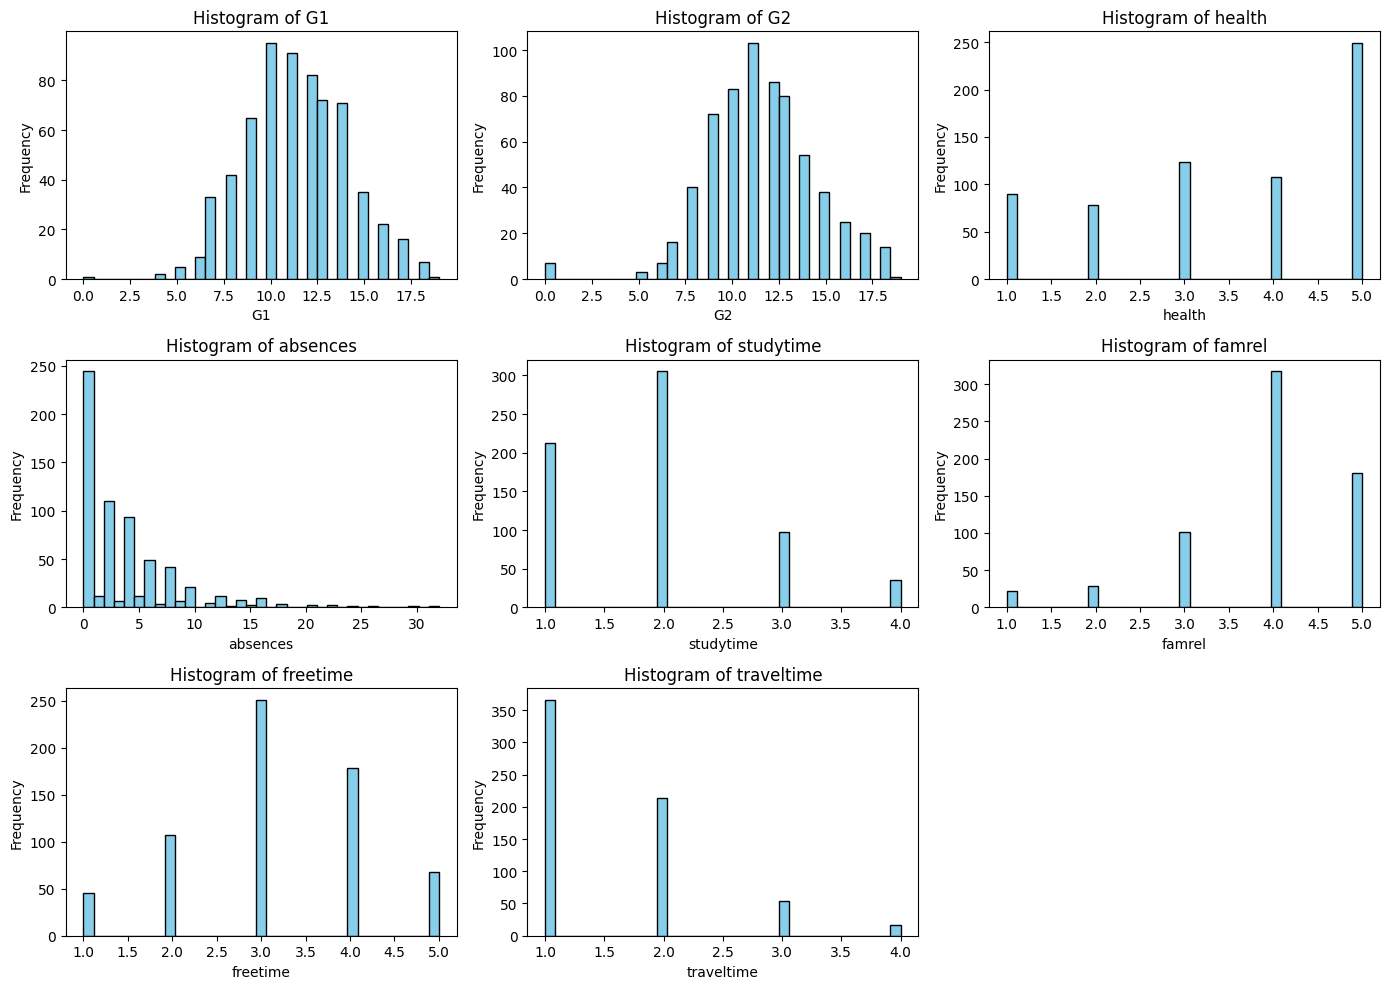

In [ ]:

# Assuming df is your DataFrame containing the selected features
Df = df.drop(['grade'],axis =1)

# Plot histograms for all features
plt.figure(figsize=(14, 10))  # Increase figsize to accommodate more subplots
for i, feature in enumerate(Df.columns):
    plt.subplot(3, 3, i + 1)  # Adjust the number of rows and columns as needed
    Df[feature].plot.hist(bins=35, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(feature))

plt.tight_layout()
plt.show()


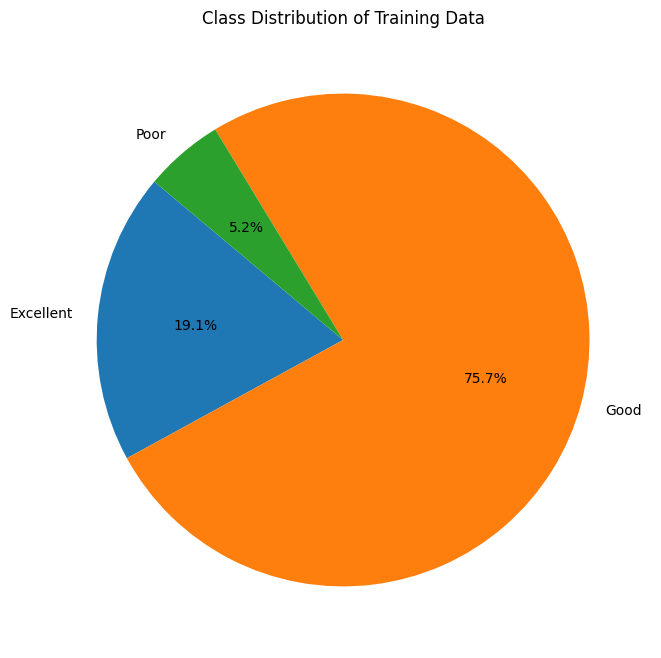

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each class in the training data
class_counts = {class_: np.sum(y_train == class_) for class_ in np.unique(y_train)}

# Plot the class distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution of Training Data')
plt.show()


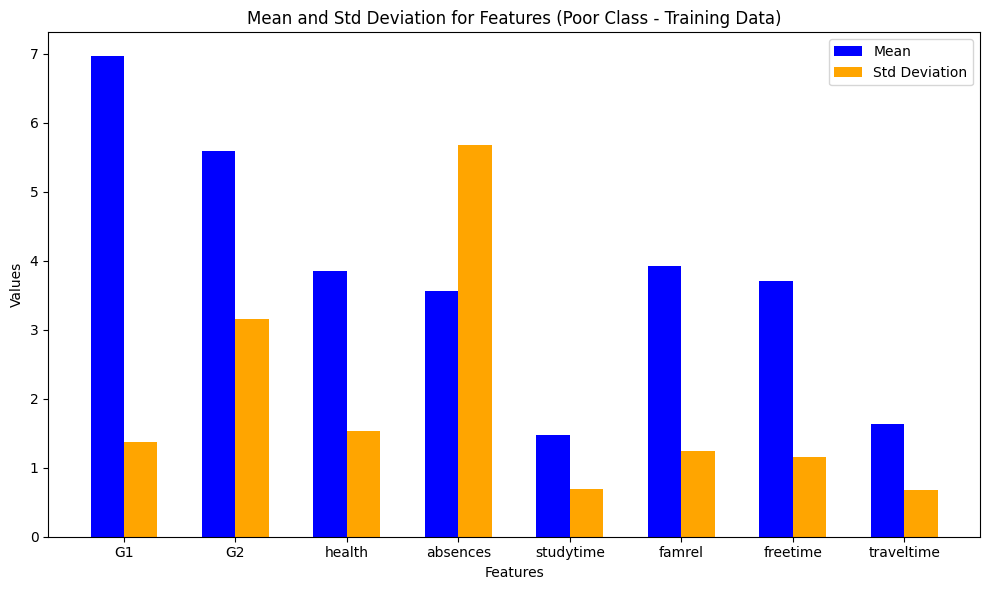

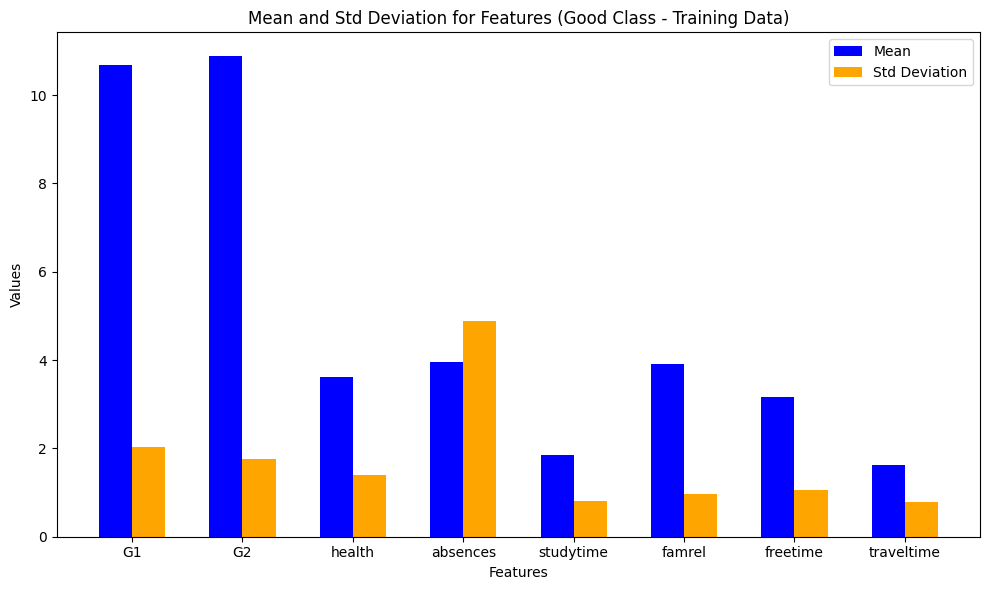

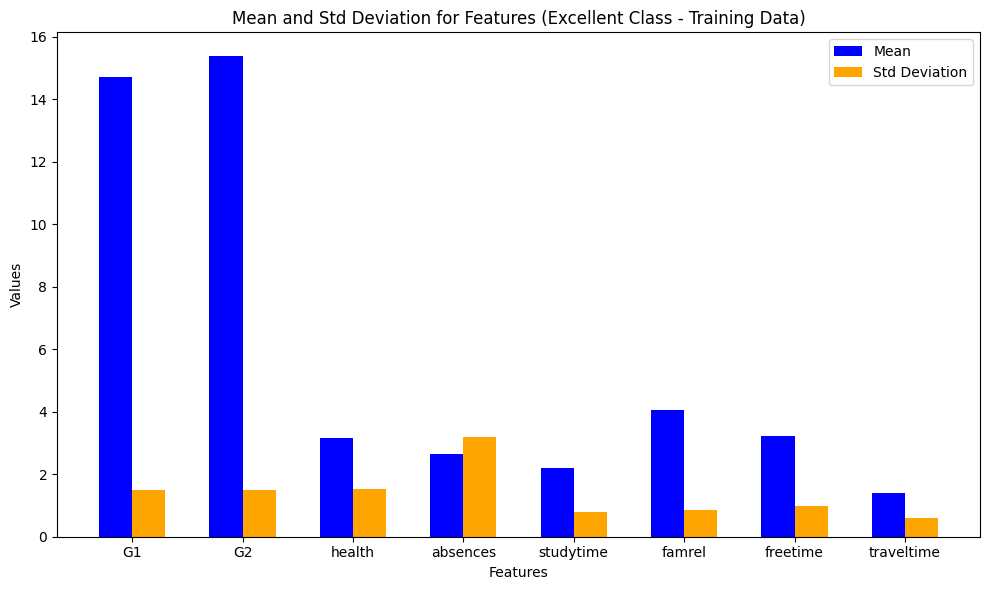

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the classes
classes = ['Poor', 'Good', 'Excellent']

# Initialize lists to store the mean and standard deviation for each class
class_means = []
class_stds = []

# Calculate mean and standard deviation for each class and feature
for class_label in classes:
    # Select only the training data corresponding to the current class
    class_train_data = X_train[y_train == class_label]

    # Calculate mean and standard deviation for each feature
    class_means.append(np.mean(class_train_data, axis=0))
    class_stds.append(np.std(class_train_data, axis=0))

# Define feature names
feature_names = Df.columns

# Plot mean values with error bars representing standard deviation for each class
for i, class_label in enumerate(classes):
    plt.figure(figsize=(10, 6))

    # Plot mean values with error bars representing standard deviation
    plt.bar(np.arange(len(feature_names)) - 0.15, class_means[i], width=0.3, align='center', label='Mean', color='blue')
    plt.bar(np.arange(len(feature_names)) + 0.15, class_stds[i], width=0.3, align='center', label='Std Deviation', color='orange')

    plt.xticks(np.arange(len(feature_names)), feature_names)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.title(f'Mean and Std Deviation for Features ({class_label} Class - Training Data)')
    plt.legend()
    plt.tight_layout()
    plt.show()


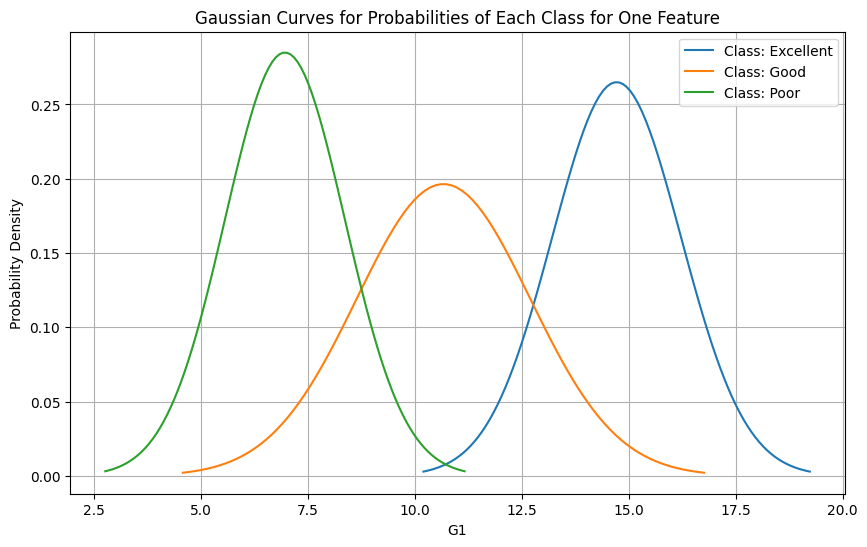

In [ ]:
class CustomGaussianNB:
    def __init__(self):
        self.class_means = defaultdict(list)
        self.class_stdevs = defaultdict(list)
        self.class_priors = defaultdict(float)
        self.classes = None

    def separate_by_class(self, X, y):
        separated = defaultdict(list)
        for i in range(len(X)):
            separated[y[i]].append(X[i])
        #print(y[200])
        #print(separated.items())
        return separated

    def calculate_mean(self, numbers):
        return sum(numbers) / float(len(numbers))

    def calculate_stdev(self, numbers):
        avg = self.calculate_mean(numbers)
        variance = sum([(x - avg) ** 2 for x in numbers]) / float(len(numbers) - 1)
        return math.sqrt(variance)

    def fit(self, X, y):
        self.classes = np.unique(y)
        separated = self.separate_by_class(X, y)
        for class_value, instances in separated.items():
            self.class_means[class_value] = [self.calculate_mean(attribute) for attribute in zip(*instances)]
            self.class_stdevs[class_value] = [self.calculate_stdev(attribute) for attribute in zip(*instances)]
            self.class_priors[class_value] = len(instances) / float(len(X))
        #print(self.class_means)
    def calculate_probability(self, x, mean, stdev):
        exponent = math.exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
        return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

    def calculate_class_probabilities(self, input_data):
      probabilities = {}
      for class_value in self.classes:
          probabilities[class_value] = []
          for i in range(len(input_data)):
              mean = self.class_means[class_value][i]
              stdev = self.class_stdevs[class_value][i]
              x = input_data[i]
              probability = self.calculate_probability(x, mean, stdev)
              probabilities[class_value].append(probability)
      return probabilities


    def predict(self, X):
        predictions = []
        for x in X:
            probabilities = self.calculate_class_probabilities(x)
            print(probabilities.items())
            best_label, best_prob = None, -1
            for class_value, probability in probabilities.items():
                if best_label is None or probability > best_prob:
                    best_prob = probability
                    best_label = class_value
            predictions.append(best_label)
            print(best_prob,best_label)
        return predictions
    def predict_probabilities(self, X):
        probabilities = []
        for x in X:
            class_probs = self.calculate_class_probabilities(x)
            probabilities.append(class_probs)
        return probabilities
    def plot_gaussian_curves(self, probabilities):
            plt.figure(figsize=(15, 10))
            for i, (class_value, class_probs) in enumerate(probabilities.items()):
                for j, prob in enumerate(class_probs):
                    mean = self.class_means[class_value][j]
                    std_dev = self.class_stdevs[class_value][j]
                    x_values = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
                    y_values = norm.pdf(x_values, mean, std_dev)
                    plt.subplot(2, 3, j+1)
                    plt.plot(x_values, y_values, label=f'Class: {class_value}')
                    plt.xlabel('Feature Value')
                    plt.ylabel('Probability Density')
                    plt.title(f'Feature {j+1}')
                    plt.legend()
                    plt.grid(True)
            plt.tight_layout()
            plt.show()
# Initialize the custom Gaussian Naive Bayes classifier
custom_classifier = CustomGaussianNB()

# Train the classifier on the training data
custom_classifier.fit(X_train, y_train)

# Get the probabilities for the first testing sample
# Get the probabilities for the first testing sample for only one feature (e.g., the first feature)
probabilities = custom_classifier.predict_probabilities([X_test[0]])

# Plot Gaussian curves for each class for only one feature
plt.figure(figsize=(10, 6))
for class_value, class_probs in probabilities[0].items():
    mean = custom_classifier.class_means[class_value][0]  # Mean for the first feature
    std_dev = custom_classifier.class_stdevs[class_value][0]  # Standard deviation for the first feature
    x_values = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
    y_values = norm.pdf(x_values, mean, std_dev)
    plt.plot(x_values, y_values, label=f'Class: {class_value}')
plt.xlabel('G1')
plt.ylabel('Probability Density')
plt.title('Gaussian Curves for Probabilities of Each Class for One Feature')
plt.legend()
plt.grid(True)
plt.show()

